In [1]:
import logging

logging.disable(logging.CRITICAL)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
from modality.contig_dataset import ContigDataset
import modality
import sys
import pyranges as pr



In [3]:
from modality.annotation import (
    get_exons,
    get_introns,
    get_five_prime_utrs,
    get_three_prime_utrs,
    get_promoters,
    get_transcripts
)

In [10]:
# # Promoter annotation
# promoter_annotation = get_promoters(reference = "mm10",).drop("Strand").apply(rename_chromosome)
# promoter_annotation = promoter_annotation.df
# promoter_annotation["Type"] = "promoter"

In [11]:
# cpg_annotations = [
#     get_introns(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     get_exons(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     pr.PyRanges(promoter_annotation),
#     pr.PyRanges(enhancer_annotation),
# ]

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [90]:
# cpg_annotations = [
#     get_introns(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     get_exons(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     get_five_prime_utrs(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     get_three_prime_utrs(reference = "mm10",).drop("Strand").apply(rename_chromosome),
#     pr.PyRanges(promoter_annotation),
# ]

2024-10-01 13:19:21 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:19:44 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:20:19 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:20:33 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:20:47 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gen

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


2024-10-01 13:28:31 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:29:15 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)
2024-10-01 13:29:31 | INFO | [modality/annotation.py:418] Removing readthrough_gene transcripts for gff (https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.basic.annotation.gff3.gz)


In [12]:
# import pickle
# # pickle cpg_annotations
# with open("cpg_annotations.pkl", "wb") as f:
#     pickle.dump(cpg_annotations, f)

In [6]:
# import pickle
# # Read the pickle
# with open("../data/CEGXRun1485_CG_fixed-strand.pickle", "rb") as f:
#     cpg_annotations = pickle.load(f)

In [46]:
#ds = 
with open("../data/CEGXRun1485_CG_fixed-strand.pickle", "rb") as f:
    df = pickle.load(f)

In [76]:
ranges_reduced = ds.reduce_byranges(
    ranges=cpg_annotations, var=["num_mc", "num_hmc", "num_total_c"]
)

In [77]:
ranges_reduced = ranges_reduced.assign_coords(group = ("sample_id", ds["type"].data))

In [78]:
ranges_reduced["frac_mc_mean"] = ranges_reduced["num_mc_sum"] / ranges_reduced["num_total_c_sum"]
ranges_reduced["frac_hmc_mean"] = ranges_reduced["num_hmc_sum"] / ranges_reduced["num_total_c_sum"]

In [79]:
ranges_reduced_hmc = ranges_reduced.where(ranges_reduced.frac_hmc_mean.notnull().all(axis = 1), drop=True)
ranges_reduced_mc = ranges_reduced.where(ranges_reduced.frac_mc_mean.notnull().all(axis = 1), drop=True)

In [13]:
df

,Gene_id,Chromosome,Start,End,Gene_name,contig,strand,mean_mc_before_tss_sense,mean_mc_after_tes_sense,mean_mc_genes_sense,...,range_length_before_tss_sense,range_length_after_tes_sense,range_length_genes_sense,range_length_first_exons_sense,range_length_first_introns_sense,range_length_exons_sense,range_length_introns_sense,range_length_five_prime_utrs_sense,range_length_three_prime_utrs_sense,selected_transcript
0,ENSMUSG00000025903.14,1,4807787,4848409,Lypla1,1,+,0.000000,0.731707,0.529368,...,200.0,1000.0,40622.0,159.0,35.0,2339.0,38089.0,90.0,1722.0,True
1,ENSMUSG00000104217.1,1,4807891,4886769,Gm37988,1,+,0.000689,0.686047,0.472292,...,200.0,1000.0,78878.0,90.0,20602.0,725.0,57461.0,NaN,NaN,True
2,ENSMUSG00000033813.15,1,4857813,4897908,Tcea1,1,+,0.001969,0.800370,0.514710,...,200.0,1000.0,40095.0,162.0,9494.0,2375.0,28064.0,99.0,1540.0,True
3,ENSMUSG00000033793.12,1,5070017,5162528,Atp6v1h,1,+,NaN,0.847909,0.648667,...,NaN,1000.0,92511.0,126.0,14273.0,1523.0,76589.0,NaN,NaN,True
4,ENSMUSG00000025905.14,1,5588465,5606130,Oprk1,1,+,0.271457,0.759259,0.680438,...,200.0,1000.0,17665.0,170.0,27.0,4501.0,12967.0,183.0,3346.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21030,ENSMUSG00000096902.7,Y,72220862,72247117,Gm20843,Y,-,NaN,0.727273,0.629630,...,NaN,1000.0,26255.0,NaN,NaN,872.0,23977.0,NaN,197.0,True
21031,ENSMUSG00000095867.2,Y,79148788,79151121,Gm20917,Y,-,NaN,NaN,0.782609,...,NaN,NaN,2333.0,NaN,1111.0,NaN,NaN,NaN,NaN,True
21032,ENSMUSG00000094660.2,Y,84562571,84564906,Gm21394,Y,-,NaN,NaN,0.679487,...,NaN,NaN,2335.0,NaN,1114.0,NaN,NaN,NaN,NaN,True
21033,ENSMUSG00000095650.2,Y,85528516,85530907,Gm20854,Y,-,NaN,0.781250,0.686275,...,NaN,1000.0,2391.0,NaN,1231.0,NaN,NaN,NaN,NaN,True


In [30]:
import xarray as xr
# Remove sense and antisense by combining both for each region
df['mean_mc_before_tss'] = df[['mean_mc_before_tss_sense', 'mean_mc_before_tss_antisense']].mean(axis=1, skipna=True)
df['mean_mc_after_tes'] = df[['mean_mc_after_tes_sense', 'mean_mc_after_tes_antisense']].mean(axis=1, skipna=True)
df['mean_mc_genes'] = df[['mean_mc_genes_sense', 'mean_mc_genes_antisense']].mean(axis=1, skipna=True)

# Now melt the dataframe with these new combined columns
df_melted = df.melt(
    id_vars=['Gene_id', 'Chromosome', 'Start', 'End', 'Gene_name', 'contig'],  # Removed 'strand'
    value_vars=['mean_mc_before_tss', 'mean_mc_after_tes', 'mean_mc_genes'],  # The combined columns
    var_name='Region', 
    value_name='frac_hmc_mean'
)

# Adjust the 'Region' column to make it cleaner
df_melted['Region'] = df_melted['Region'].str.replace('mean_mc_', '')

# Ensure 'Start' and 'End' columns are numeric
df_melted['Start'] = pd.to_numeric(df_melted['Start'], errors='coerce')
df_melted['End'] = pd.to_numeric(df_melted['End'], errors='coerce')
df_melted = df_melted.dropna(subset=['Start', 'End'])

# Convert to xarray Dataset
# ds = df_melted.set_index(['Gene_id', 'Chromosome', 'Start', 'End', 'Gene_name', 'contig', 'Region']).to_xarray()


In [28]:
df_melted.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63100    False
63101    False
63102    False
63103    False
63104    False
Length: 63105, dtype: bool

In [49]:
df

,Gene_id,Chromosome,Start,End,Gene_name,contig,strand,mean_mc_before_tss_sense,mean_mc_after_tes_sense,mean_mc_genes_sense,...,range_length_before_tss_sense,range_length_after_tes_sense,range_length_genes_sense,range_length_first_exons_sense,range_length_first_introns_sense,range_length_exons_sense,range_length_introns_sense,range_length_five_prime_utrs_sense,range_length_three_prime_utrs_sense,selected_transcript
0,ENSMUSG00000025903.14,1,4807787,4848409,Lypla1,1,+,0.000000,0.731707,0.529368,...,200.0,1000.0,40622.0,159.0,35.0,2339.0,38089.0,90.0,1722.0,True
1,ENSMUSG00000104217.1,1,4807891,4886769,Gm37988,1,+,0.000689,0.686047,0.472292,...,200.0,1000.0,78878.0,90.0,20602.0,725.0,57461.0,NaN,NaN,True
2,ENSMUSG00000033813.15,1,4857813,4897908,Tcea1,1,+,0.001969,0.800370,0.514710,...,200.0,1000.0,40095.0,162.0,9494.0,2375.0,28064.0,99.0,1540.0,True
3,ENSMUSG00000033793.12,1,5070017,5162528,Atp6v1h,1,+,NaN,0.847909,0.648667,...,NaN,1000.0,92511.0,126.0,14273.0,1523.0,76589.0,NaN,NaN,True
4,ENSMUSG00000025905.14,1,5588465,5606130,Oprk1,1,+,0.271457,0.759259,0.680438,...,200.0,1000.0,17665.0,170.0,27.0,4501.0,12967.0,183.0,3346.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21030,ENSMUSG00000096902.7,Y,72220862,72247117,Gm20843,Y,-,NaN,0.727273,0.629630,...,NaN,1000.0,26255.0,NaN,NaN,872.0,23977.0,NaN,197.0,True
21031,ENSMUSG00000095867.2,Y,79148788,79151121,Gm20917,Y,-,NaN,NaN,0.782609,...,NaN,NaN,2333.0,NaN,1111.0,NaN,NaN,NaN,NaN,True
21032,ENSMUSG00000094660.2,Y,84562571,84564906,Gm21394,Y,-,NaN,NaN,0.679487,...,NaN,NaN,2335.0,NaN,1114.0,NaN,NaN,NaN,NaN,True
21033,ENSMUSG00000095650.2,Y,85528516,85530907,Gm20854,Y,-,NaN,0.781250,0.686275,...,NaN,1000.0,2391.0,NaN,1231.0,NaN,NaN,NaN,NaN,True


In [43]:
df_melted_mc

,Gene_id,Chromosome,Start,End,Gene_name,contig,Region_Strand,Mean_mC,Strand,Region
0,ENSMUSG00000025903.14,1,4807787,4848409,Lypla1,1,mean_mc_before_tss_sense,0.000000,Sense,before_tss_sense
1,ENSMUSG00000104217.1,1,4807891,4886769,Gm37988,1,mean_mc_before_tss_sense,0.000689,Sense,before_tss_sense
2,ENSMUSG00000033813.15,1,4857813,4897908,Tcea1,1,mean_mc_before_tss_sense,0.001969,Sense,before_tss_sense
3,ENSMUSG00000033793.12,1,5070017,5162528,Atp6v1h,1,mean_mc_before_tss_sense,NaN,Sense,before_tss_sense
4,ENSMUSG00000025905.14,1,5588465,5606130,Oprk1,1,mean_mc_before_tss_sense,0.271457,Sense,before_tss_sense
...,...,...,...,...,...,...,...,...,...,...
126205,ENSMUSG00000096902.7,Y,72220862,72247117,Gm20843,Y,mean_mc_genes,0.714815,Antisense,genes
126206,ENSMUSG00000095867.2,Y,79148788,79151121,Gm20917,Y,mean_mc_genes,0.782609,Antisense,genes
126207,ENSMUSG00000094660.2,Y,84562571,84564906,Gm21394,Y,mean_mc_genes,0.696886,Antisense,genes
126208,ENSMUSG00000095650.2,Y,85528516,85530907,Gm20854,Y,mean_mc_genes,0.618137,Antisense,genes


In [45]:
df_melted_mc['Region_Strand'].str.extract(r'mean_mc_(\w+)')[0]

0         before_tss_sense
1         before_tss_sense
2         before_tss_sense
3         before_tss_sense
4         before_tss_sense
                ...       
126205               genes
126206               genes
126207               genes
126208               genes
126209               genes
Name: 0, Length: 126210, dtype: object

In [52]:
df_melted_mc['Strand'].unique()

array(['Sense'], dtype=object)

In [59]:
df_melted_mc['Strand'].unique()

array(['Antisense'], dtype=object)

In [56]:
df_melted_mc['Region_Strand'].str.extract(r'mean_mc_(\w+)')[0]

0         before_tss_sense
1         before_tss_sense
2         before_tss_sense
3         before_tss_sense
4         before_tss_sense
                ...       
126205     genes_antisense
126206     genes_antisense
126207     genes_antisense
126208     genes_antisense
126209     genes_antisense
Name: 0, Length: 126210, dtype: object

In [73]:
df_melted_mc['Region_Strand'].str.extract(r'mean_mc_(\w+)_(sense|antisense)')[0]

0         before_tss
1         before_tss
2         before_tss
3         before_tss
4         before_tss
             ...    
126205         genes
126206         genes
126207         genes
126208         genes
126209         genes
Name: 0, Length: 126210, dtype: object

In [75]:
df.columns

Index(['Gene_id', 'Chromosome', 'Start', 'End', 'Gene_name', 'contig',
       'strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense',
       'mean_mc_genes_sense', 'mean_mc_first_exons_sense',
       'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense',
       'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense',
       'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense',
       'mean_mc_exons_sense', 'mean_mc_introns_sense',
       'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense',
       'mean_mc_exons_antisense', 'mean_mc_introns_antisense',
       'mean_mc_five_prime_utrs_antisense',
       'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense',
       'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense',
       'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense',
       'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense',
       'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense',
       'm

In [78]:
mod = "modc"
regions = ["before_tss", "five_prime_utrs", "first_exons", "first_introns", "introns", "exons", "three_prime_utrs" , "after_tes"]
features = [f"mean_{mod}_{r}_sense" for r in regions] + [f"mean_{mod}_{r}_antisense" for r in regions]
features

['mean_modc_before_tss_sense',
 'mean_modc_five_prime_utrs_sense',
 'mean_modc_first_exons_sense',
 'mean_modc_first_introns_sense',
 'mean_modc_introns_sense',
 'mean_modc_exons_sense',
 'mean_modc_three_prime_utrs_sense',
 'mean_modc_after_tes_sense',
 'mean_modc_before_tss_antisense',
 'mean_modc_five_prime_utrs_antisense',
 'mean_modc_first_exons_antisense',
 'mean_modc_first_introns_antisense',
 'mean_modc_introns_antisense',
 'mean_modc_exons_antisense',
 'mean_modc_three_prime_utrs_antisense',
 'mean_modc_after_tes_antisense']

In [81]:
df_melted_mc

,Gene_id,Chromosome,Start,End,Gene_name,contig,Region_Strand,Mean_mC,Strand,Region
0,ENSMUSG00000025903.14,1,4807787,4848409,Lypla1,1,mean_modc_before_tss_sense,0.000471,Sense,NaN
1,ENSMUSG00000104217.1,1,4807891,4886769,Gm37988,1,mean_modc_before_tss_sense,0.002066,Sense,NaN
2,ENSMUSG00000033813.15,1,4857813,4897908,Tcea1,1,mean_modc_before_tss_sense,0.002953,Sense,NaN
3,ENSMUSG00000033793.12,1,5070017,5162528,Atp6v1h,1,mean_modc_before_tss_sense,NaN,Sense,NaN
4,ENSMUSG00000025905.14,1,5588465,5606130,Oprk1,1,mean_modc_before_tss_sense,0.317365,Sense,NaN
...,...,...,...,...,...,...,...,...,...,...
336555,ENSMUSG00000096902.7,Y,72220862,72247117,Gm20843,Y,mean_modc_after_tes_antisense,0.750000,Antisense,NaN
336556,ENSMUSG00000095867.2,Y,79148788,79151121,Gm20917,Y,mean_modc_after_tes_antisense,NaN,Antisense,NaN
336557,ENSMUSG00000094660.2,Y,84562571,84564906,Gm21394,Y,mean_modc_after_tes_antisense,NaN,Antisense,NaN
336558,ENSMUSG00000095650.2,Y,85528516,85530907,Gm20854,Y,mean_modc_after_tes_antisense,0.857143,Antisense,NaN


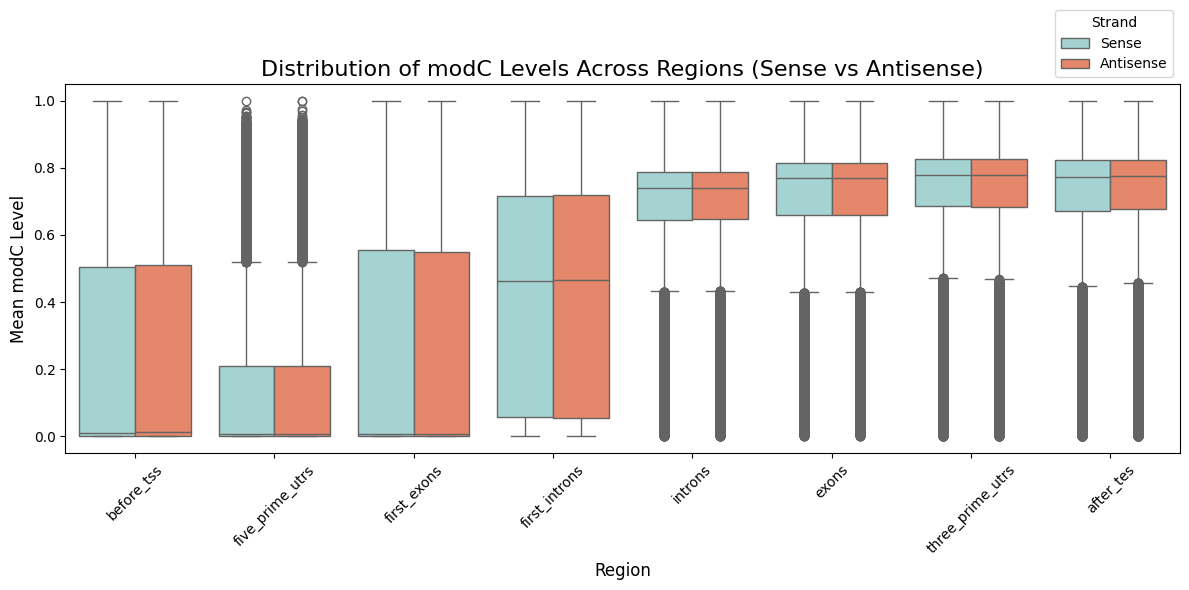

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_meth_regions(df, mod, features, legend_loc):
    nameMap = {"modc" : "modC", "mc" : "mC", "hmc" : "hmC"}

    # Load your DataFrame
    # df = pd.read_csv('your_data_file.csv')  # Uncomment and modify as needed
    df_melted_mc = df.melt(
        id_vars=['Gene_id', 'Chromosome', 'Start', 'End', 'Gene_name', 'contig'], 
        value_vars=features,
        var_name='Region_Strand', 
        value_name='Mean_mC'
    )

    # Extract sense and antisense information
    df_melted_mc['Strand'] = df_melted_mc['Region_Strand'].apply(lambda x: 'Sense' if '_sense'in x else 'Antisense')
    df_melted_mc['Region'] = df_melted_mc['Region_Strand'].str.extract(rf'mean_{mod}_(\w+)_(sense|antisense)')[0]
    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_melted_mc,
        x='Region',
        y='Mean_mC',
        hue='Strand',  # Differentiate between Sense and Antisense
        palette=["#9CDBD9", "#F87C56"],
        dodge=True  # Ensures the box plots for Sense and Antisense are side by side
    )

    # Customise plot labels and appearance
    # plt.title(f'Distribution of {nameMap[mod]} Levels Across Regions (Sense vs Antisense)', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel(f'Mean {nameMap[mod]} Level', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Strand', loc=legend_loc, bbox_to_anchor=(1, 1), frameon=True)


    # Show plot
    plt.tight_layout()
    plt.show()


mod = "modc"
regions = ["before_tss", "five_prime_utrs", "first_exons", "first_introns", "introns", "exons", "three_prime_utrs" , "after_tes"]
features = [f"mean_{mod}_{r}_sense" for r in regions] + [f"mean_{mod}_{r}_antisense" for r in regions]
features
plot_meth_regions(df, mod, features, 'lower right')



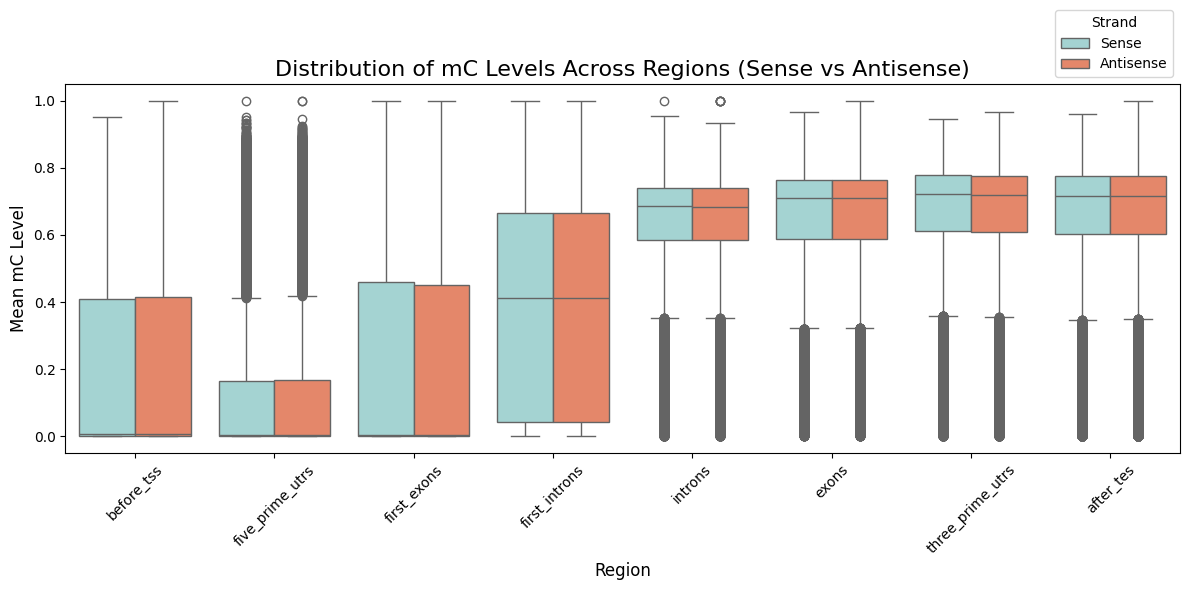

In [95]:
mod = "mc"
regions = ["before_tss", "five_prime_utrs", "first_exons", "first_introns", "introns", "exons", "three_prime_utrs" , "after_tes"]
features = [f"mean_{mod}_{r}_sense" for r in regions] + [f"mean_{mod}_{r}_antisense" for r in regions]

plot_meth_regions(df, mod, features, 'lower right')

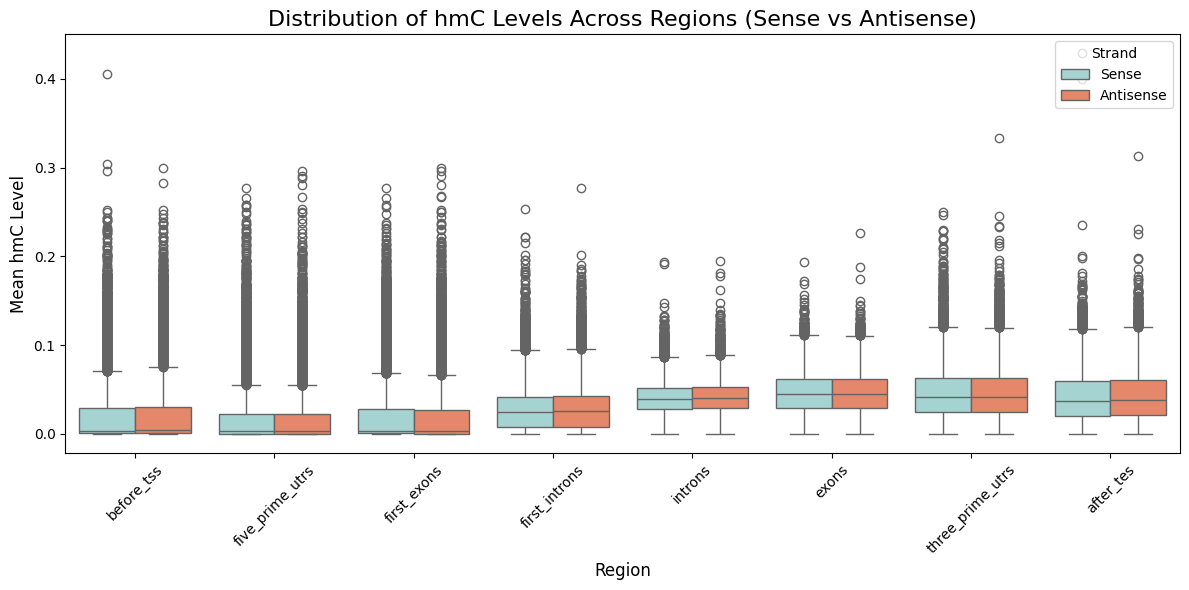

In [96]:
mod = "hmc"
regions = ["before_tss", "five_prime_utrs", "first_exons", "first_introns", "introns", "exons", "three_prime_utrs" , "after_tes"]
features = [f"mean_{mod}_{r}_sense" for r in regions] + [f"mean_{mod}_{r}_antisense" for r in regions]

plot_meth_regions(df, mod, features, 'upper right')

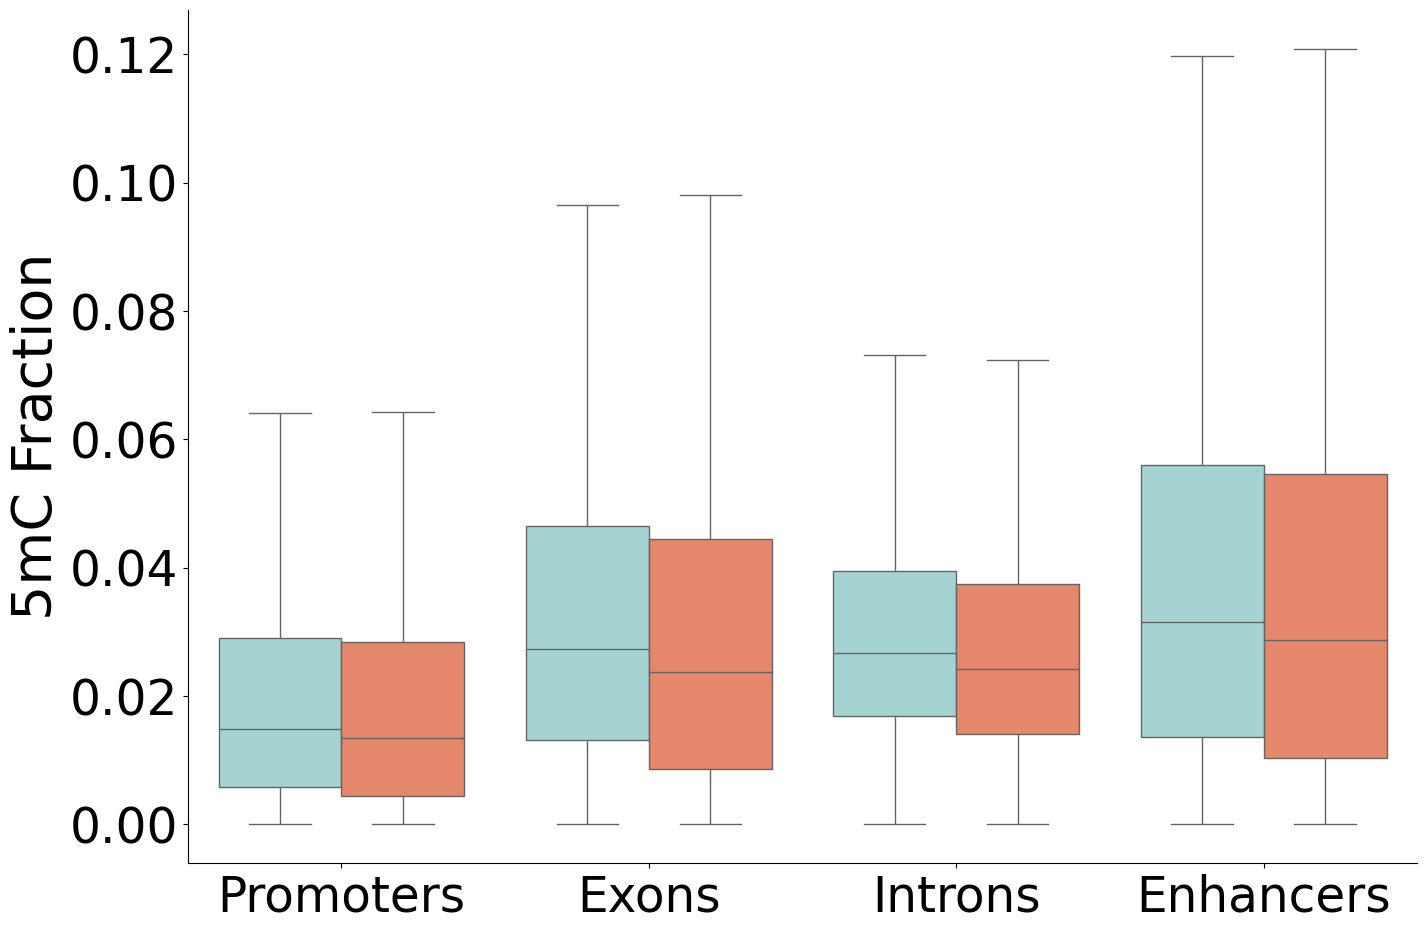

In [167]:
from modality.plot_features import catplot
fig = catplot(
    ranges_reduced,
    kind='box',
    hue='group',
    y='frac_hmc_mean',
    x='Type',
    #order = ['promoter', 'exon', 'intron', ... ], # change order as needed
    showfliers=False,
    palette=["#9CDBD9", "#F87C56"],
    legend = False
    
)

plt.xlabel('')
plt.ylabel('5mC Fraction', fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

xticks = plt.xticks()[0]
plt.xticks(xticks,  labels)

fig.figure.set_size_inches(15, 10)

# save to svg
plt.savefig("5hmc_fractions_bulk.svg", format="svg")

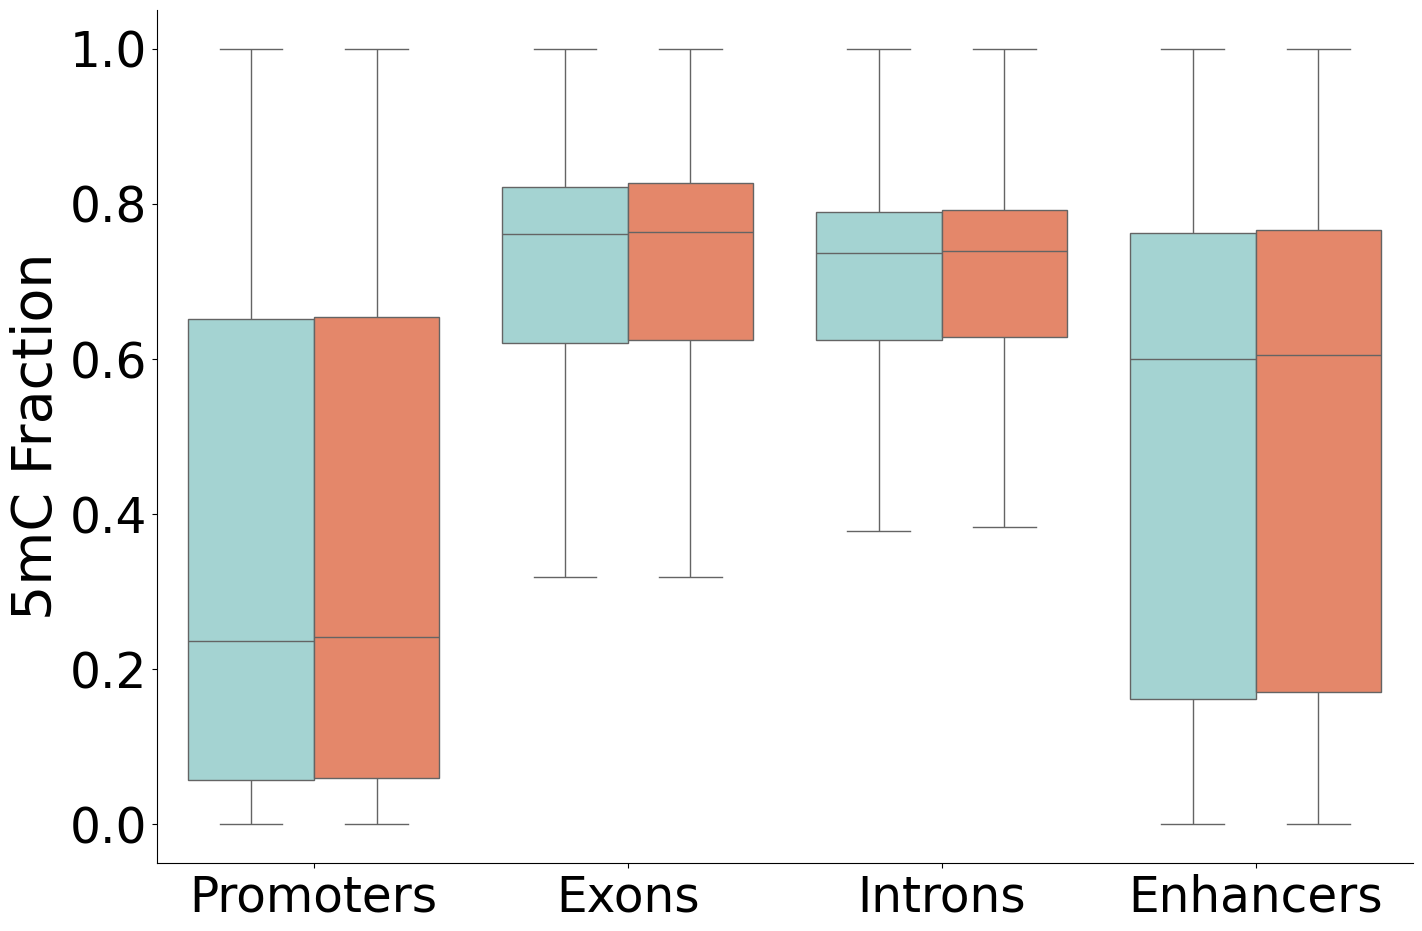

In [169]:
from modality.plot_features import catplot
fig = catplot(
    ranges_reduced,
    kind='box',
    hue='group',
    y='frac_mc_mean',
    x='Type',
    #order = ['promoter', 'exon', 'intron', ..],
    hue_order = ['Ligation', 'Tagmentation'],
    showfliers=False,
    palette=["#9CDBD9", "#F87C56"],
    legend = False
    
)

plt.xlabel('')
plt.ylabel('5mC Fraction', fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

xticks = plt.xticks()[0]
labels = ['Promoters', 'Exons', 'Introns', 'Enhancers']
plt.xticks(xticks,  labels)

fig.figure.set_size_inches(15, 10)

# save to svg
plt.savefig("5mc_fractions_bulk.svg", format="svg")